In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import cm
import matplotlib.colors as colors
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0', dldarkblue =  '#0D5BDC')

## Neuron without activation - Linear Regression Model

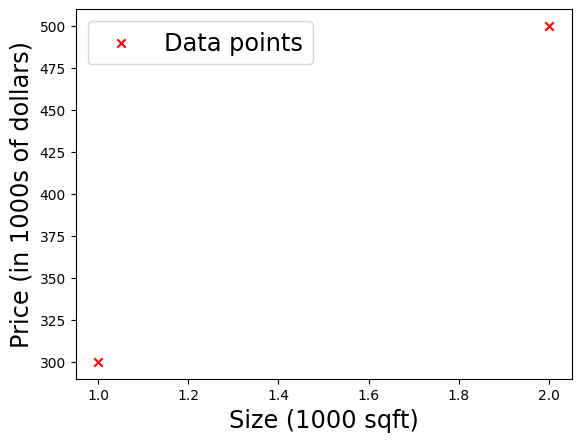

In [34]:
x_train = np.array([[1.0], [2.0]], dtype = np.float32)
y_train = np.array([[300.0], [500.0]], dtype = np.float32)

fig, ax = plt.subplots(1, 1)
ax.scatter(x_train, y_train, marker='x', c='r', label='Data points')
ax.legend(fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [35]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear', )
linear_layer.get_weights()

[]

In [36]:
a1 = linear_layer(x_train[0].reshape(1, 1))
print(a1)

tf.Tensor([[0.6169547]], shape=(1, 1), dtype=float32)


In [37]:
w, b = linear_layer.get_weights()
print(f"w = {w}, b = {b}")

w = [[0.6169547]], b = [0.]


In [38]:
set_w = np.array([[200]])
set_b = np.array([100])
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [39]:
a1 = linear_layer(x_train[0].reshape(1, 1))
print(a1)
alin = np.dot(set_w, x_train[0].reshape(1, 1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [40]:
prediction_tf = linear_layer(x_train)
prediction_np = np.dot(x_train, set_w) + set_b

In [41]:
def plt_linear(X_train, Y_train, prediction_tf, prediction_np):
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    ax[0].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[0].plot(X_train, prediction_tf,  c=dlc['dlblue'], label="model output")
    ax[0].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color=dlc['dlmagenta'])
    ax[0].legend(fontsize='xx-large')
    ax[0].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[0].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[0].set_title("Tensorflow prediction",fontsize='xx-large')

    ax[1].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[1].plot(X_train, prediction_np,  c=dlc['dlblue'], label="model output")
    ax[1].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color=dlc['dlmagenta'])
    ax[1].legend(fontsize='xx-large')
    ax[1].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[1].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[1].set_title("Numpy prediction",fontsize='xx-large')
    plt.show()

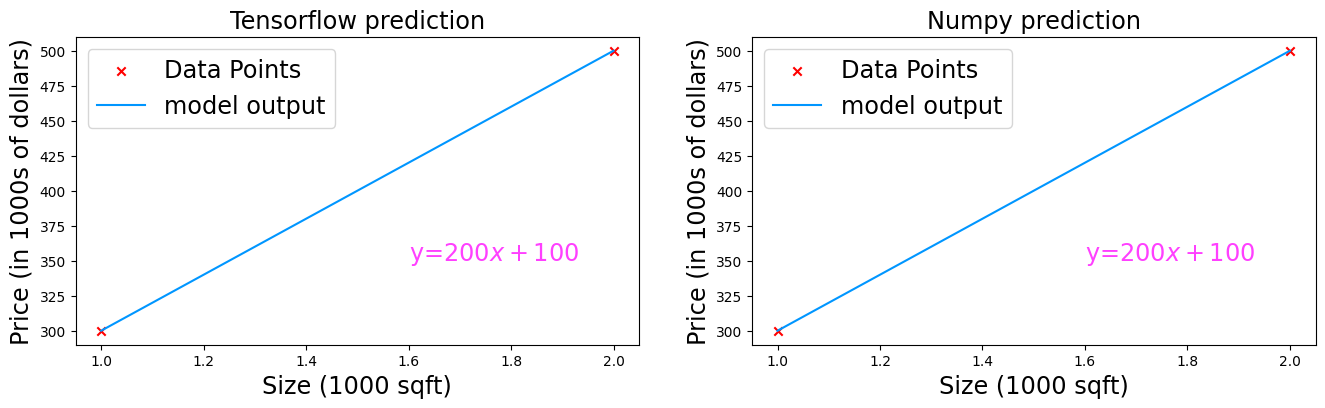

In [42]:
plt_linear(x_train, y_train, prediction_tf, prediction_np)

## Neuron with Sigmoid activation

In [43]:
x_train = np.array([0., 1, 2, 3, 4, 5], dtype = np.float32).reshape(-1, 1)
y_train = np.array([0, 0, 0, 1, 1, 1], dtype = np.float32).reshape(-1, 1)

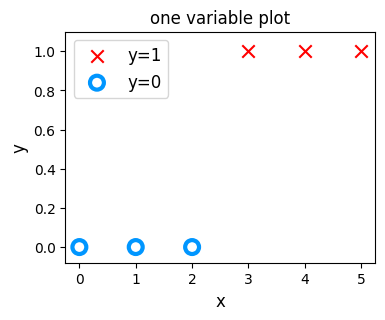

In [44]:
pos = y_train == 1
neg = y_train == 0

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.scatter(x_train[pos], y_train[pos], marker='x', s=80, c='red', label='y=1')
ax.scatter(x_train[neg], y_train[neg], marker='o', s=100, label='y=0', facecolors='none', edgecolors=dlc['dlblue'], lw=3)
ax.set_ylim(-0.08, 1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [45]:
model = Sequential([
    Input(shape=(1,)),
    Dense(1, activation='sigmoid', name='L1')
])

In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w, b)
print(w.shape, b.shape)

[[0.7292484]] [0.]
(1, 1) (1,)


In [48]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [49]:
def sigmoidnp(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

In [50]:
a1 = model.predict(x_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w, x_train[0].reshape(1, 1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[[0.01098694]]
[[0.01098694]]


In [51]:
def plt_prob_1d(ax,fwb):
    """ plots a decision boundary but include shading to indicate the probability """
    #setup useful ranges and common linspaces
    x_space  = np.linspace(0, 5 , 50)
    y_space  = np.linspace(0, 1 , 50)

    # get probability for x range, extend to y
    z = np.zeros((len(x_space),len(y_space)))
    for i in range(len(x_space)):
        x = np.array([[x_space[i]]])
        z[:,i] = fwb(x)

    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.0, 0.5)
    pcm = ax.pcolormesh(x_space, y_space, z,
                   norm=cm.colors.Normalize(vmin=0, vmax=1),
                   cmap=new_cmap, shading='nearest', alpha = 0.9)
    ax.figure.colorbar(pcm, ax=ax)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """ truncates color map """
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg):
    fig,ax = plt.subplots(1,2,figsize=(16,4))

    layerf= lambda x : model.predict(x)
    plt_prob_1d(ax[0], layerf)

    ax[0].scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
    ax[0].scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
                  edgecolors=dlc["dlblue"],lw=3)

    ax[0].set_ylim(-0.08,1.1)
    ax[0].set_xlim(-0.5,5.5)
    ax[0].set_ylabel('y', fontsize=16)
    ax[0].set_xlabel('x', fontsize=16)
    ax[0].set_title('Tensorflow Model', fontsize=20)
    ax[0].legend(fontsize=16)

    layerf= lambda x : sigmoidnp(np.dot(set_w,x.reshape(1,1)) + set_b)
    plt_prob_1d(ax[1], layerf)

    ax[1].scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
    ax[1].scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
                  edgecolors=dlc["dlblue"],lw=3)

    ax[1].set_ylim(-0.08,1.1)
    ax[1].set_xlim(-0.5,5.5)
    ax[1].set_ylabel('y', fontsize=16)
    ax[1].set_xlabel('x', fontsize=16)
    ax[1].set_title('Numpy Model', fontsize=20)
    ax[1].legend(fontsize=16)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━

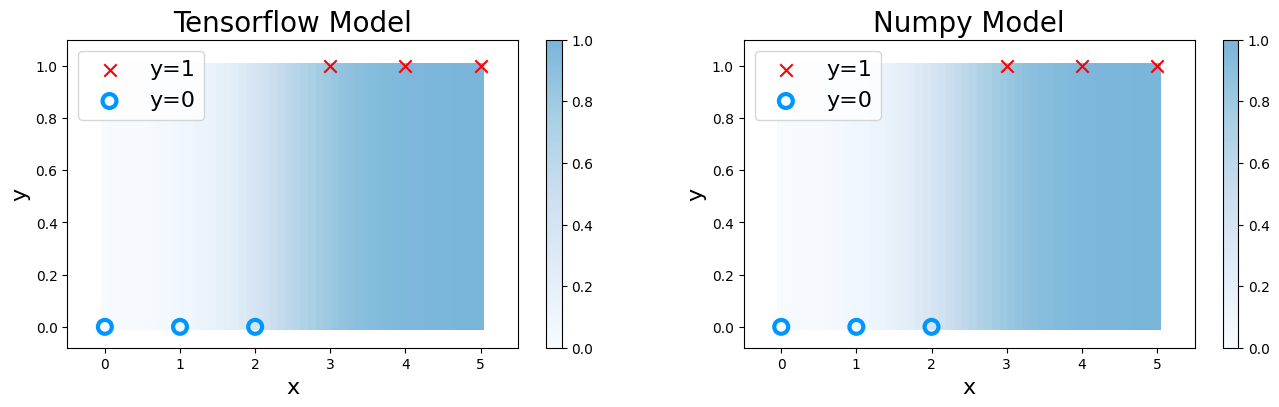

In [52]:
plt_logistic(x_train, y_train, model, set_w, set_b, pos, neg)